<a href="https://colab.research.google.com/github/CheeRanidu/CMP7005/blob/main/st20272023_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import os

# Change to the desired directory
os.chdir('/content/drive/MyDrive/Beijin_Air_Dataset')

# Verify the current directory
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/MyDrive/Beijin_Air_Dataset


In [46]:
import glob
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'Aotizhongxin.csv']

In [47]:
df_list = [pd.read_csv(file) for file in csv_files]

In [48]:
df_merged = pd.concat(df_list, axis=0, ignore_index=True)

In [49]:
df_merged.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2013,3,4,23,54.0,75.0,21.0,43.0,1200.0,95.0,4.2,1012.6,-11.5,0.0,ESE,0.8,Changping
96,97,2013,3,5,0,57.0,69.0,20.0,37.0,900.0,95.0,2.8,1012.1,-11.2,0.0,ENE,0.4,Changping
97,98,2013,3,5,1,48.0,57.0,38.0,66.0,1600.0,95.0,1.8,1011.7,-11.0,0.0,NNE,0.6,Changping
98,99,2013,3,5,2,65.0,99.0,32.0,54.0,1399.0,95.0,0.8,1011.4,-10.7,0.0,N,0.6,Changping


In [50]:
df_merged.shape

(280512, 18)

In [51]:
# Capitalize all column names
df_merged.columns = df_merged.columns.str.upper()

# Verify the changes
print(df_merged.columns)


Index(['NO', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WD', 'WSPM', 'STATION'],
      dtype='object')


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   NO       280512 non-null  int64  
 1   YEAR     280512 non-null  int64  
 2   MONTH    280512 non-null  int64  
 3   DAY      280512 non-null  int64  
 4   HOUR     280512 non-null  int64  
 5   PM2.5    274441 non-null  float64
 6   PM10     275976 non-null  float64
 7   SO2      275149 non-null  float64
 8   NO2      272329 non-null  float64
 9   CO       266224 non-null  float64
 10  O3       272752 non-null  float64
 11  TEMP     280224 non-null  float64
 12  PRES     280229 non-null  float64
 13  DEWP     280222 non-null  float64
 14  RAIN     280232 non-null  float64
 15  WD       279453 non-null  object 
 16  WSPM     280279 non-null  float64
 17  STATION  280512 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 38.5+ MB


Converting Object dtypes to category dtype for better Memory-effeciency and Performance.


In [53]:
# Convert the 'station' column to 'category' dtype
df_merged['STATION'] = df_merged['STATION'].astype('category')
# Convert the 'direction' column to 'category' dtype
df_merged['WD'] = df_merged['WD'].astype('category')



In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   NO       280512 non-null  int64   
 1   YEAR     280512 non-null  int64   
 2   MONTH    280512 non-null  int64   
 3   DAY      280512 non-null  int64   
 4   HOUR     280512 non-null  int64   
 5   PM2.5    274441 non-null  float64 
 6   PM10     275976 non-null  float64 
 7   SO2      275149 non-null  float64 
 8   NO2      272329 non-null  float64 
 9   CO       266224 non-null  float64 
 10  O3       272752 non-null  float64 
 11  TEMP     280224 non-null  float64 
 12  PRES     280229 non-null  float64 
 13  DEWP     280222 non-null  float64 
 14  RAIN     280232 non-null  float64 
 15  WD       279453 non-null  category
 16  WSPM     280279 non-null  float64 
 17  STATION  280512 non-null  category
dtypes: category(2), float64(11), int64(5)
memory usage: 34.8 MB


In [55]:
df_merged.describe()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,274441.000000,275976.000000,275149.000000,272329.000000,266224.000000,272752.000000,280224.000000,280229.000000,280222.000000,280232.000000,280279.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.426228,103.422622,15.804754,48.712058,1198.780602,58.982900,13.524339,1010.093102,2.375351,0.064501,1.730218
std,10122.122958,1.177199,3.448709,8.800108,6.922199,79.903323,91.373721,21.604235,34.965866,1134.452174,56.591943,11.444337,10.463074,13.822351,0.825446,1.254662
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,2.856000,21.000000,500.000000,13.000000,3.100000,1001.600000,-9.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,7.000000,41.000000,900.000000,47.000000,14.500000,1009.700000,2.900000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,20.000000,69.000000,1500.000000,83.000000,23.200000,1018.300000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.000000,29.100000,72.500000,12.900000


In [56]:
df_merged.head()

,NO,YEAR,MONTH,DAY,HOUR,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [57]:
#Droping NO column
df_merged = df_merged.drop('NO', axis=1)

Date-time Convertion

In [58]:
# Combine the year, month, day, and hour into a single datetime column
df_merged['datetime'] = pd.to_datetime(df_merged[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Drop the original date and time columns if no longer needed
df_merged = df_merged.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR'])

# # Optionally set 'datetime' as the index
# data = data.set_index('datetime')

# Display the first few rows to verify
df_merged.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,datetime
0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [59]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     274441 non-null  float64       
 1   PM10      275976 non-null  float64       
 2   SO2       275149 non-null  float64       
 3   NO2       272329 non-null  float64       
 4   CO        266224 non-null  float64       
 5   O3        272752 non-null  float64       
 6   TEMP      280224 non-null  float64       
 7   PRES      280229 non-null  float64       
 8   DEWP      280222 non-null  float64       
 9   RAIN      280232 non-null  float64       
 10  WD        279453 non-null  category      
 11  WSPM      280279 non-null  float64       
 12  STATION   280512 non-null  category      
 13  datetime  280512 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(11)
memory usage: 26.2 MB


### **Handling Missing Values**

In [60]:
df_merged.isnull().sum()

,0
PM2.5,6071
PM10,4536
SO2,5363
NO2,8183
CO,14288
O3,7760
TEMP,288
PRES,283
DEWP,290
RAIN,280


In [61]:
null_percentage = df_merged.isnull().mean() * 100

# Display the result
print(null_percentage)

PM2.5       2.164257
PM10        1.617043
SO2         1.911861
NO2         2.917166
CO          5.093543
O3          2.766370
TEMP        0.102669
PRES        0.100887
DEWP        0.103382
RAIN        0.099817
WD          0.377524
WSPM        0.083062
STATION     0.000000
datetime    0.000000
dtype: float64


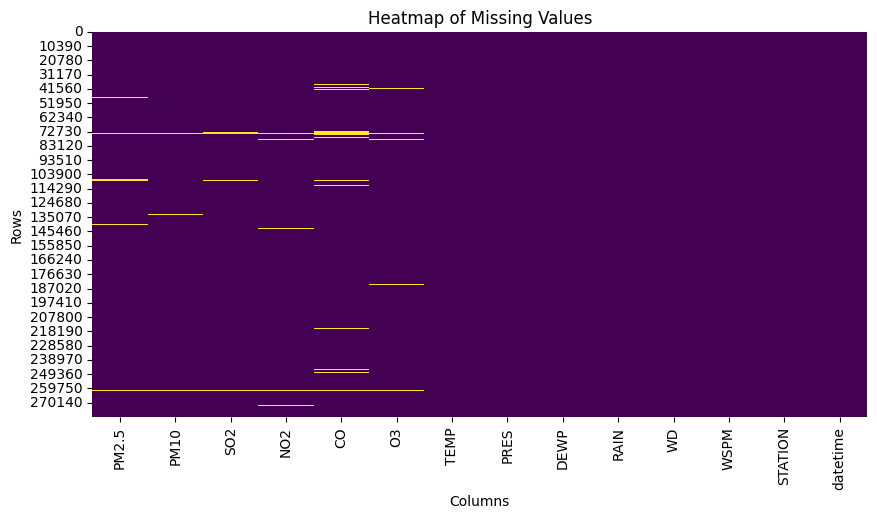

In [62]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_merged.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

Set DATETIME as index

In [63]:
# Capitalize all column names
df_merged.columns = df_merged.columns.str.upper()

In [64]:
data = df_merged.set_index('DATETIME')

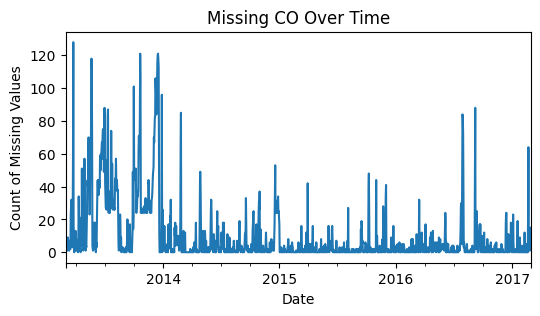

In [65]:
missing_CO = data['CO'].isnull().astype(int)

# Plot missingness over time
plt.figure(figsize=(6, 3))
missing_CO.resample('D').sum().plot(title="Missing CO Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()

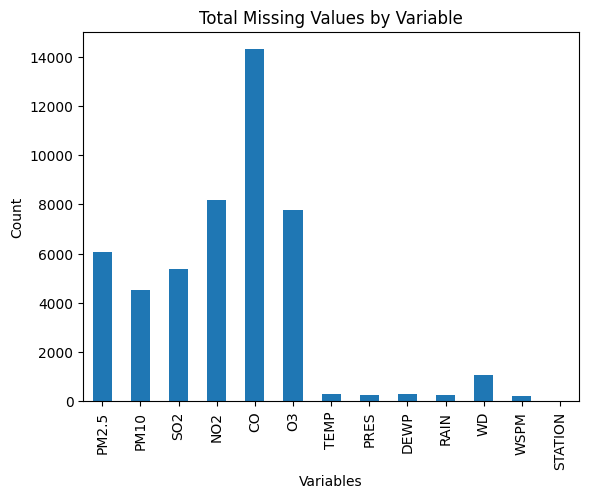

In [66]:
# Total missing values per variable
data.isnull().sum().plot(kind='bar', title='Total Missing Values by Variable', xlabel='Variables', ylabel='Count')
plt.show()


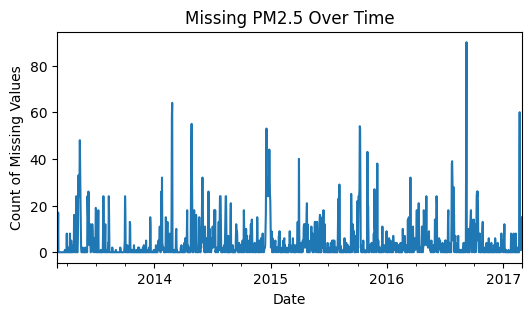

In [67]:
# Select a variable to analyze missingness
missing_PM25 = data['PM2.5'].isnull().astype(int)

# Plot missingness over time
plt.figure(figsize=(6, 3))
missing_PM25.resample('D').sum().plot(title="Missing PM2.5 Over Time", ylabel="Count of Missing Values", xlabel="Date")
plt.show()


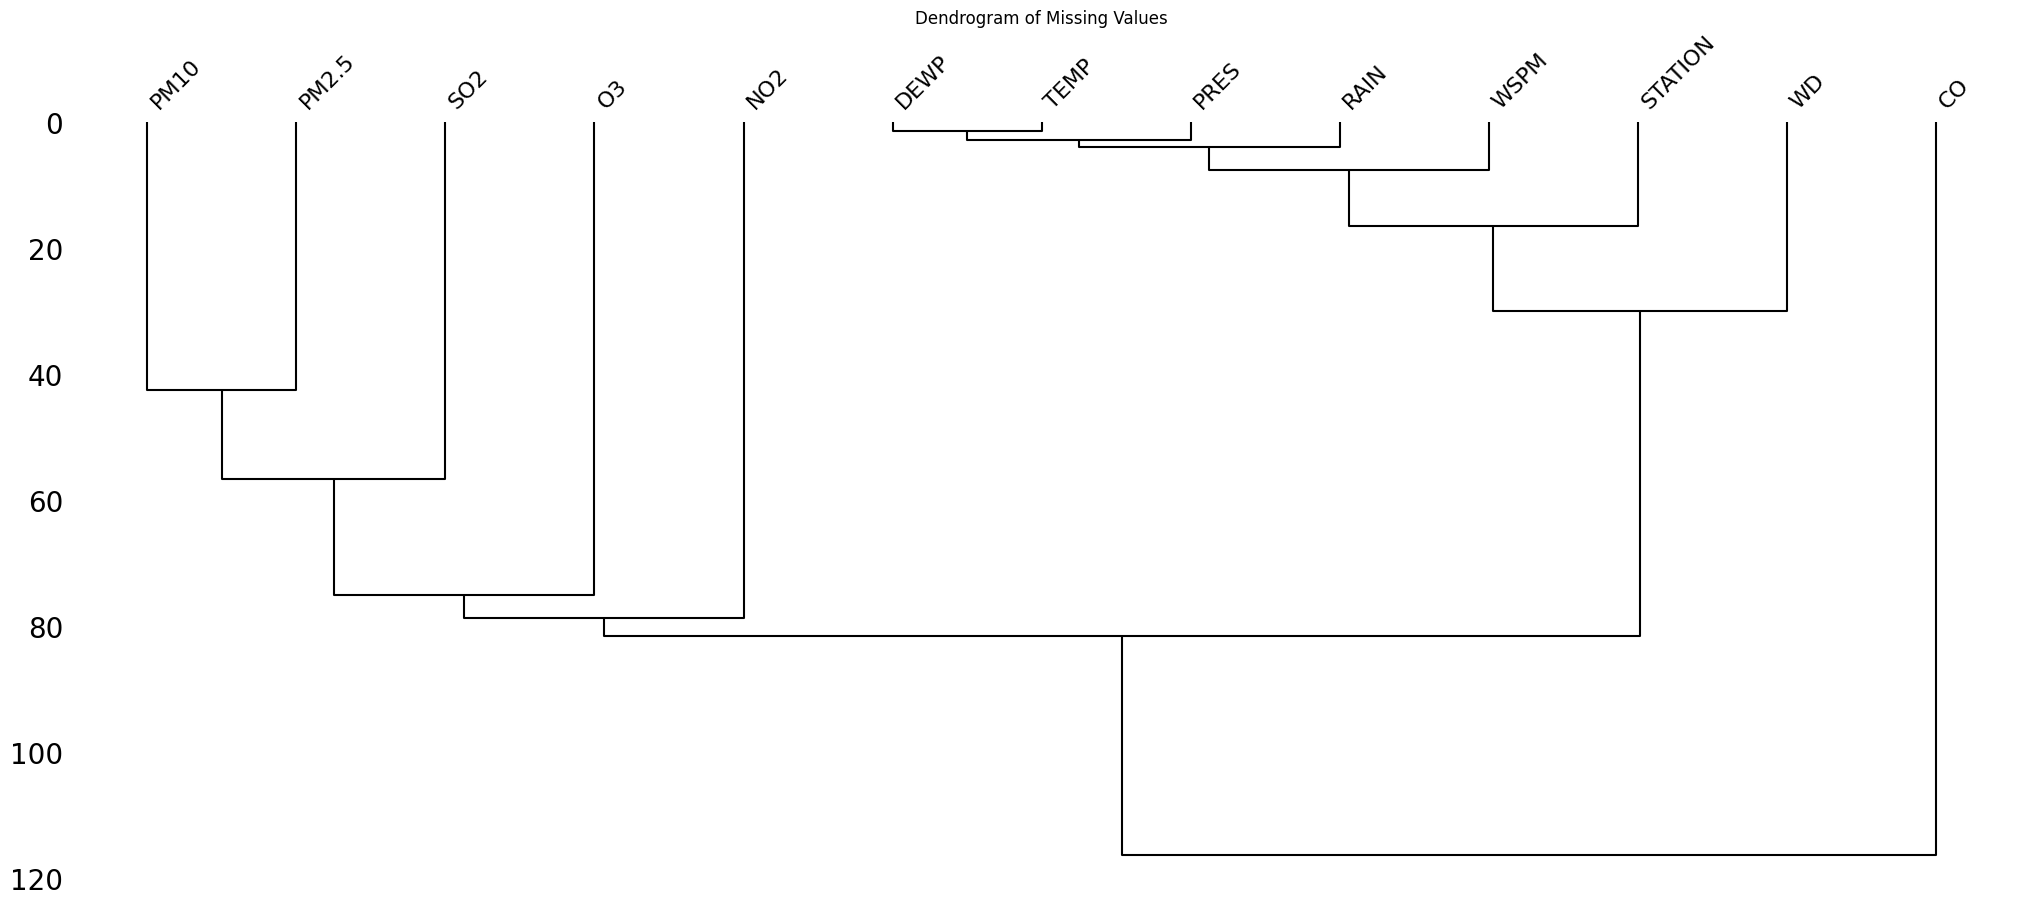

In [68]:
import missingno as msno
msno.dendrogram(data)
plt.title("Dendrogram of Missing Values")
plt.show()


### **Filling Missing Values**

Using time-based interpolation to fill gaps based on neighboring values.

In [69]:
# Select pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Apply linear interpolation
data[pollutants] = data[pollutants].interpolate(method='time')

# Verify the result
print(data[pollutants].isnull().sum())  # Check if missing values are filled


PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64


Meteorological variables often follow continuous and predictable trends:
Linear Interpolation: Works well for variables like TEMP or PRES.

In [70]:
columns_to_interpolate = ['TEMP', 'PRES', 'DEWP']

# Apply linear interpolation
data[columns_to_interpolate] = data[columns_to_interpolate].interpolate(method='linear')

Using FFill & BFill

In [71]:
# # Apply forward-fill for missing values in the RAIN column
# data['RAIN'] = data['RAIN'].fillna(method='ffill')
data['RAIN'] = data['RAIN'].ffill()

# # Optionally, apply backward-fill if forward-fill isn't enough for some gaps
# data['RAIN'] = data['RAIN'].fillna(method='bfill')
data['RAIN'] = data['RAIN'].bfill()

Coneverting Wind Direction for Degree(Angle) For better understanding

In [72]:
direction_mapping = {
    'N': 0,         # North
    'NNE': 22.5,    # North-North-East
    'NE': 45,       # North-East
    'ENE': 67.5,    # East-North-East
    'E': 90,        # East
    'SE': 135,      # South-East
    'S': 180,       # South
    'SSW': 202.5,   # South-South-West
    'SW': 225,      # South-West
    'WSW': 247.5,   # West-South-West
    'W': 270,       # West
    'WNW': 292.5,   # West-North-West
    'NW': 315,      # North-West
    'NNW': 337.5    # North-North-West
}


# Replace the 'wd' column with the corresponding numeric values
data['WD'] = data['WD'].map(direction_mapping)

Using FFill & BFill

In [73]:
data['WD'] = data['WD'].ffill()
data['WD'] = data['WD'].bfill()

data['WSPM'] = data['WSPM'].ffill()
data['WSPM'] = data['WSPM'].bfill()

In [74]:
# from sklearn.impute import KNNImputer

# # Select the columns for wind direction and wind speed
# columns_for_knn = ['WD', 'WSPM']

# # Initialize KNN Imputer with a specified number of neighbors
# knn_imputer = KNNImputer(n_neighbors=5)

# # Apply KNN imputer to the selected columns
# data[columns_for_knn] = knn_imputer.fit_transform(data[columns_for_knn])

In [75]:
data.isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


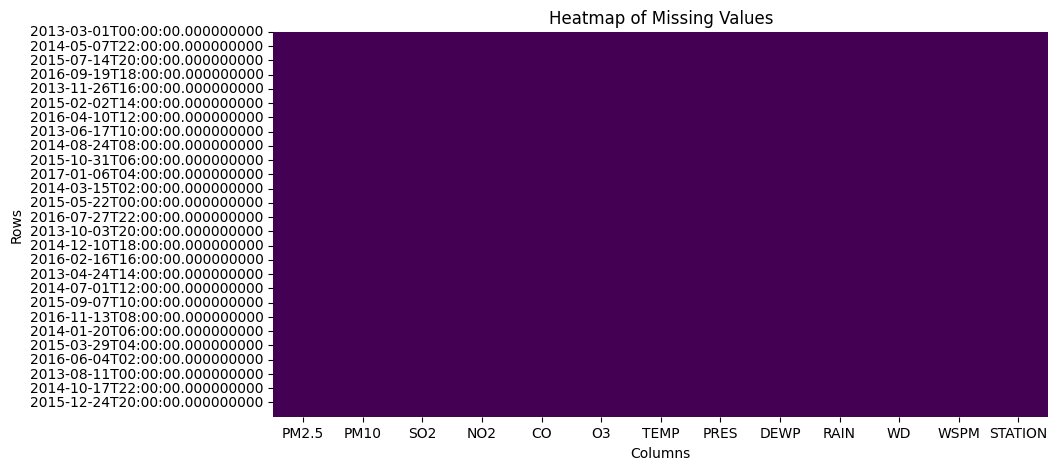

In [76]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [77]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION
DATETIME,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,90.0,0.5,Changping
2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,67.5,0.7,Changping
2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,67.5,0.2,Changping
2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,22.5,1.0,Changping
2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,0.0,2.1,Changping


In [78]:
data.dtypes

,0
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64
O3,float64
TEMP,float64
PRES,float64
DEWP,float64
RAIN,float64


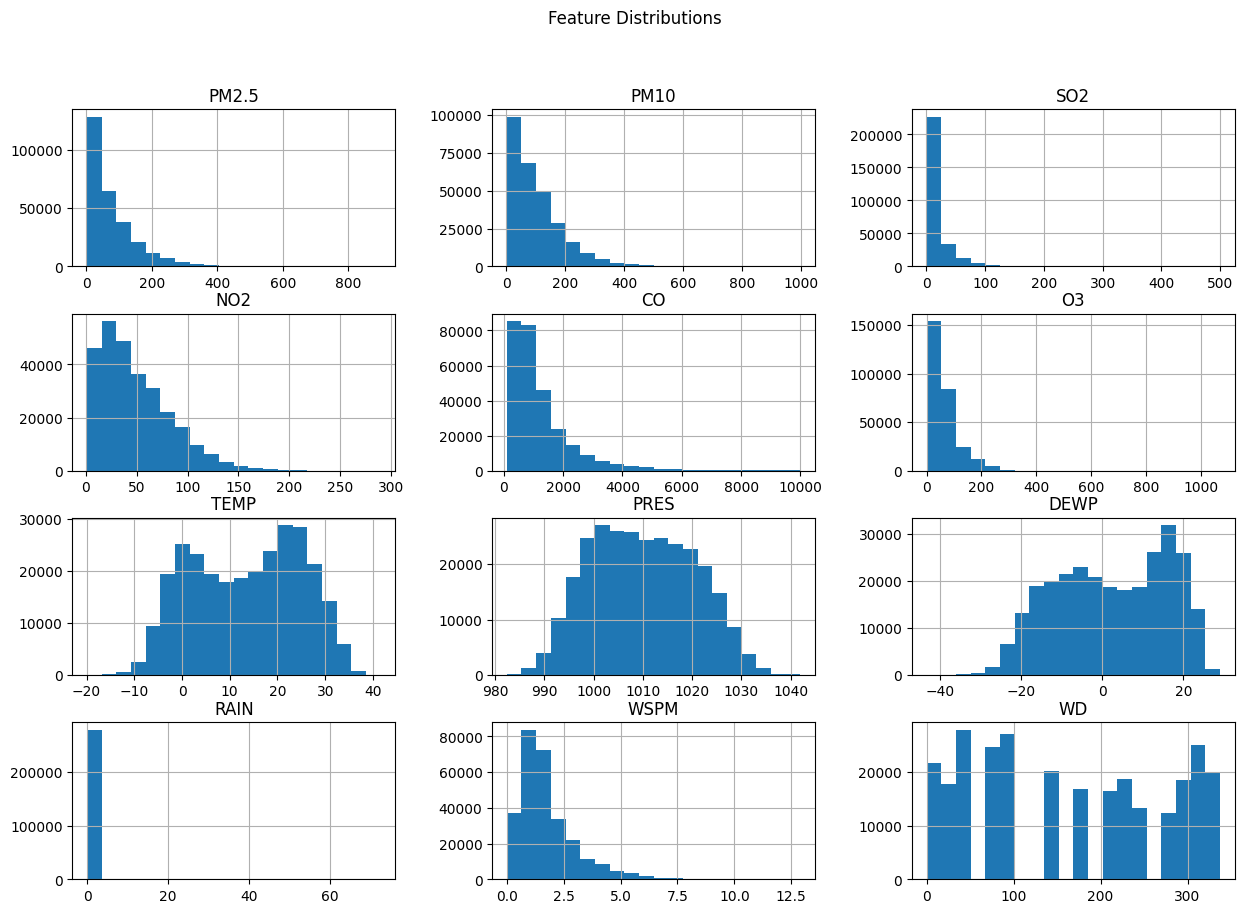

In [79]:
data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','WD']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [80]:
summary_stats = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].describe()
print(summary_stats)

               PM2.5           PM10            SO2            NO2  \
count  280512.000000  280512.000000  280512.000000  280512.000000   
mean       78.497773     103.632867      15.858183      48.688399   
std        80.137502      92.050400      21.711953      34.998712   
min         2.000000       2.000000       0.285600       1.026500   
25%        20.000000      35.000000       3.000000      21.000000   
50%        54.000000      81.000000       7.000000      41.000000   
75%       109.000000     144.000000      20.000000      69.000000   
max       898.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  280512.000000  280512.000000  280512.000000  280512.000000   
mean     1199.339789      58.830262      13.516115    1010.099669   
std      1137.502108      56.609053      11.446285      10.463213   
min       100.000000       0.214200     -19.900000     982.400000   
25%       500.000000      13.0000

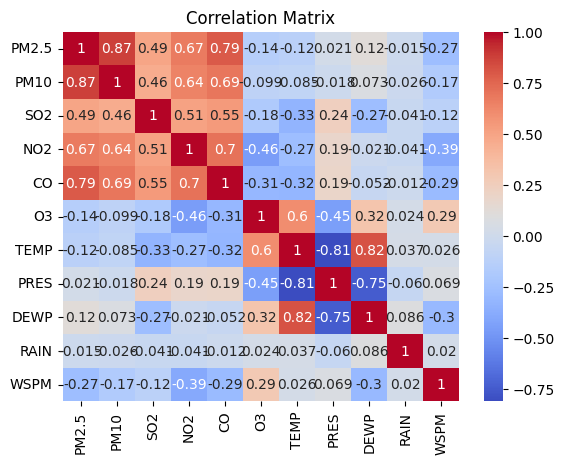

In [81]:
correlation_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

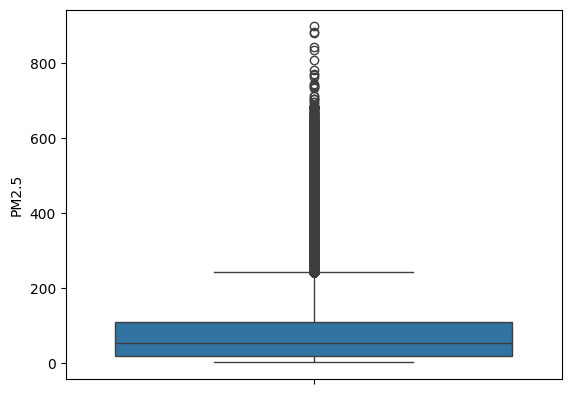

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['PM2.5'])
plt.show()


<Axes: xlabel='DATETIME'>

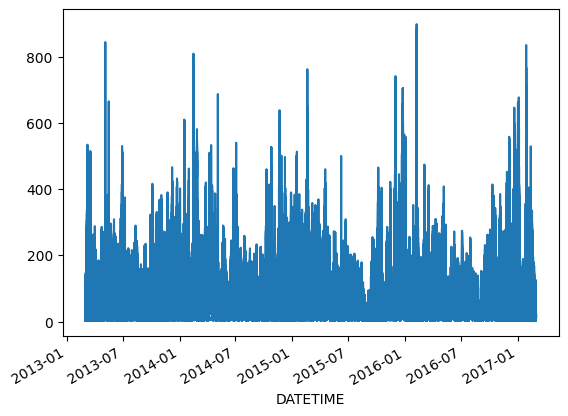

In [83]:
data['PM2.5'].plot()


**Feature** **Enginnering** - Calculating AQ Index

In [86]:
import pandas as pd

# Define AQI breakpoints for PM2.5, PM10, NO2, and other pollutants
breakpoints = {
    'PM2.5': {
        'low': [0, 12, 35.4, 55.4, 150, 250],
        'high': [50, 100, 150, 200, 300, 500, 900],  # max value updated
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500, 900]
    },
    'PM10': {
        'low': [0, 54, 154, 254, 354, 424],
        'high': [50, 100, 150, 200, 300, 500, 1000],  # max value updated
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500, 1000]
    },
    'NO2': {
        'low': [0, 53, 100, 360, 649, 1249],
        'high': [50, 100, 150, 200, 300, 500],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'CO': {
        'low': [0, 4.4, 9.4, 12.4, 15.4, 30.4],
        'high': [50, 100, 150, 200, 300, 500, 10000],  # max value updated
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500, 10000]
    },
    'SO2': {
        'low': [0, 35, 75, 185, 304, 604],
        'high': [50, 100, 150, 200, 300, 500],
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500]
    },
    'O3': {
        'low': [0, 54, 70, 85, 105, 200],
        'high': [50, 100, 150, 200, 300, 500, 1100],  # max value updated
        'low_aqi': [0, 50, 100, 150, 200, 300],
        'high_aqi': [50, 100, 150, 200, 300, 500, 1100]
    }
}

# Function to calculate AQI based on the given concentration and pollutant
def calculate_aqi(concentration, pollutant):
    low_bp = breakpoints[pollutant]['low']
    high_bp = breakpoints[pollutant]['high']
    low_aqi = breakpoints[pollutant]['low_aqi']
    high_aqi = breakpoints[pollutant]['high_aqi']

    # Loop through the breakpoints to find the correct range
    for i in range(len(low_bp)-1):
        if low_bp[i] <= concentration <= high_bp[i]:
            # Apply the interpolation formula to calculate AQI
            I_low = low_aqi[i]
            I_high = high_aqi[i]
            BP_low = low_bp[i]
            BP_high = high_bp[i]
            aqi = ((I_high - I_low) / (BP_high - BP_low)) * (concentration - BP_low) + I_low
            return aqi

    return None  # If concentration is outside of the breakpoints range

# Function to calculate the maximum AQI from all pollutants for each row
def calculate_max_aqi(row):
    aqi_pm25 = calculate_aqi(row['PM2.5'], 'PM2.5')
    aqi_pm10 = calculate_aqi(row['PM10'], 'PM10')
    aqi_no2 = calculate_aqi(row['NO2'], 'NO2')
    aqi_co = calculate_aqi(row['CO'], 'CO')
    aqi_so2 = calculate_aqi(row['SO2'], 'SO2')
    aqi_o3 = calculate_aqi(row['O3'], 'O3')

    # Handle None values (if concentration is outside the defined breakpoints)
    aqi_values = [aqi_pm25, aqi_pm10, aqi_no2, aqi_co, aqi_so2, aqi_o3]
    valid_aqi_values = [aqi for aqi in aqi_values if aqi is not None]

    if valid_aqi_values:
        return max(valid_aqi_values)  # Return the highest AQI value
    else:
        return None  # Return None if all AQI values are invalid

# Apply AQI calculation for each row
data['AQI'] = data.apply(calculate_max_aqi, axis=1)

# Show the updated DataFrame with AQI
print(data)


                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
DATETIME                                                                        
2013-03-01 00:00:00    3.0   6.0  13.0   7.0  300.0  85.0  -2.3  1020.8 -19.7   
2013-03-01 01:00:00    3.0   3.0   6.0   6.0  300.0  85.0  -2.5  1021.3 -19.0   
2013-03-01 02:00:00    3.0   3.0  22.0  13.0  400.0  74.0  -3.0  1021.3 -19.9   
2013-03-01 03:00:00    3.0   6.0  12.0   8.0  300.0  81.0  -3.6  1021.8 -19.1   
2013-03-01 04:00:00    3.0   3.0  14.0   8.0  300.0  81.0  -3.5  1022.3 -19.4   
...                    ...   ...   ...   ...    ...   ...   ...     ...   ...   
2017-02-28 19:00:00   12.0  29.0   5.0  35.0  400.0  95.0  12.5  1013.5 -16.2   
2017-02-28 20:00:00   13.0  37.0   7.0  45.0  500.0  81.0  11.6  1013.6 -15.1   
2017-02-28 21:00:00   16.0  37.0  10.0  66.0  700.0  58.0  10.8  1014.2 -13.3   
2017-02-28 22:00:00   21.0  44.0  12.0  87.0  700.0  35.0  10.5  1014.4 -12.9   
2017-02-28 23:00:00   19.0  

In [87]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,AQI
DATETIME,,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,90.0,0.5,Changping,300.00000
2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,67.5,0.7,Changping,300.00000
2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,67.5,0.2,Changping,71.73913
2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,22.5,1.0,Changping,300.00000
2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,0.0,2.1,Changping,300.00000


In [88]:
data.isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


In [101]:
summary_stats1 = data[['AQI']].describe()
print(summary_stats1)

                 AQI
count  280512.000000
mean      137.199280
std        80.753625
min         1.000000
25%        75.531915
50%       121.250000
75%       193.478261
max       300.000000


**Data Scaling**

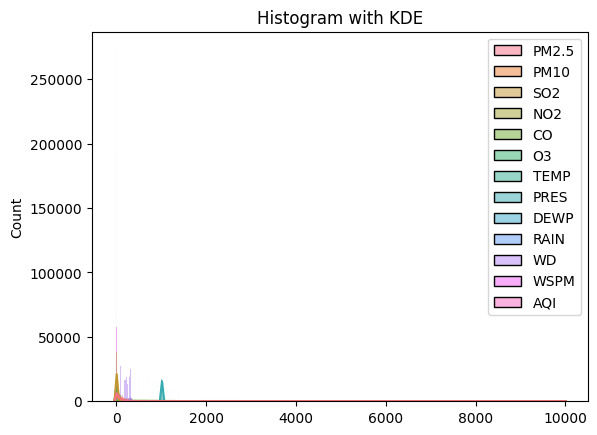

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with a kernel density estimate (KDE) overlay
sns.histplot(data, kde=True)
plt.title('Histogram with KDE')
plt.show()


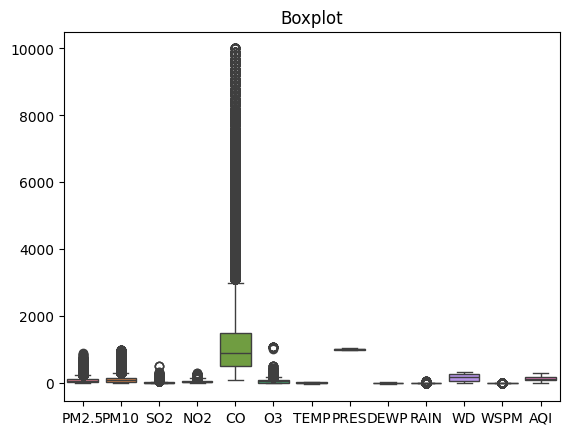

In [102]:
sns.boxplot(data)
plt.title('Boxplot')
plt.show()

In [103]:
data_temp = data

In [104]:
data_temp.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,AQI
DATETIME,,,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,90.0,0.5,Changping,300.00000
2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,67.5,0.7,Changping,300.00000
2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,67.5,0.2,Changping,71.73913
2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,22.5,1.0,Changping,300.00000
2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,0.0,2.1,Changping,300.00000


In [109]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize only 'feature1' and 'feature2'
data_temp[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WD','WSPM','AQI']] = scaler.fit_transform(data_temp[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WD','WSPM','AQI']])

print(data_temp)


                        PM2.5      PM10       SO2       NO2        CO  \
DATETIME                                                                
2013-03-01 00:00:00  0.001116  0.004012  0.025443  0.020671  0.020202   
2013-03-01 01:00:00  0.001116  0.001003  0.011435  0.017211  0.020202   
2013-03-01 02:00:00  0.001116  0.001003  0.043454  0.041435  0.030303   
2013-03-01 03:00:00  0.001116  0.004012  0.023442  0.024132  0.020202   
2013-03-01 04:00:00  0.001116  0.001003  0.027444  0.024132  0.020202   
...                       ...       ...       ...       ...       ...   
2017-02-28 19:00:00  0.011161  0.027081  0.009434  0.117566  0.030303   
2017-02-28 20:00:00  0.012277  0.035105  0.013436  0.152171  0.040404   
2017-02-28 21:00:00  0.015625  0.035105  0.019440  0.224842  0.060606   
2017-02-28 22:00:00  0.021205  0.042126  0.023442  0.297513  0.060606   
2017-02-28 23:00:00  0.018973  0.029087  0.019440  0.269829  0.050505   

                           O3      TEMP      PRES 

In [110]:
data_temp.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WD,WSPM,STATION,AQI
DATETIME,,,,,,,,,,,,,,
2013-03-01 00:00:00,0.001116,0.004012,0.025443,0.020671,0.020202,0.079181,0.286179,0.644295,0.326897,0.0,0.266667,0.038760,Changping,1.000000
2013-03-01 01:00:00,0.001116,0.001003,0.011435,0.017211,0.020202,0.079181,0.282927,0.652685,0.336552,0.0,0.200000,0.054264,Changping,1.000000
2013-03-01 02:00:00,0.001116,0.001003,0.043454,0.041435,0.030303,0.068908,0.274797,0.652685,0.324138,0.0,0.200000,0.015504,Changping,0.236586
2013-03-01 03:00:00,0.001116,0.004012,0.023442,0.024132,0.020202,0.075445,0.265041,0.661074,0.335172,0.0,0.066667,0.077519,Changping,1.000000
2013-03-01 04:00:00,0.001116,0.001003,0.027444,0.024132,0.020202,0.075445,0.266667,0.669463,0.331034,0.0,0.000000,0.162791,Changping,1.000000
